In [1]:
import os, time, warnings, math, pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from scipy.stats import moment
from scipy.stats import randint as sp_randint
from tqdm import tqdm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.datasets import load_digits
from sklearn.metrics import mean_absolute_error,r2_score
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.set_option("display.precision", 14)
path="C:/Users/danie/Documents/GitHub/OlgaDanCapstone/GPUProject"
os.chdir(path)
flatui = ["#0033A0", "#C8102E", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(flatui)
sns.palplot(sns.color_palette())

In [2]:
train = pd.read_csv('train.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})
# train = pd.read_csv('1st100000000.csv', dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32})

In [5]:
# %%time
# train['acoustic_data'].std() = 10.735707249510964
# train['acoustic_data'].mean() = 4.519467573700124
# train['acoustic_data'].min() = -5515
# train['acoustic_data'].max() = 5444
# train['time_to_failure'].mean() = 5.678285
# train['time_to_failure'].std() = 3.6726966
# train['time_to_failure'].min() = .000095503965
# train['time_to_failure'].max() = 16.1074
#Mean Abs Error = 1.61
ErPercent = 4.0682849999999995/5.678285
# type(train)
# train.describe()
# train.head()
# train.columns
# train.acoustic_data.head()
ErPercent

0.7164636857783644

In [11]:
#Select rows meeting logical condition, and only the specific columns .
# plotme = plotme.loc[plotme['time_to_failure'] < 4.8, ['acoustic_data','time_to_failure']]
# plotme = plotme.loc[plotme['acoustic_data'] > -5000, ['acoustic_data','time_to_failure']]

plotme1 = train.iloc[:31_600_000]
plotme2 = train.iloc[31_800_000:79_700_000]
plotme3 = train.iloc[80_500_000:]
plotme = pd.concat([plotme1,plotme2,plotme3])
plotme.to_csv('train_outliersremoved.csv')

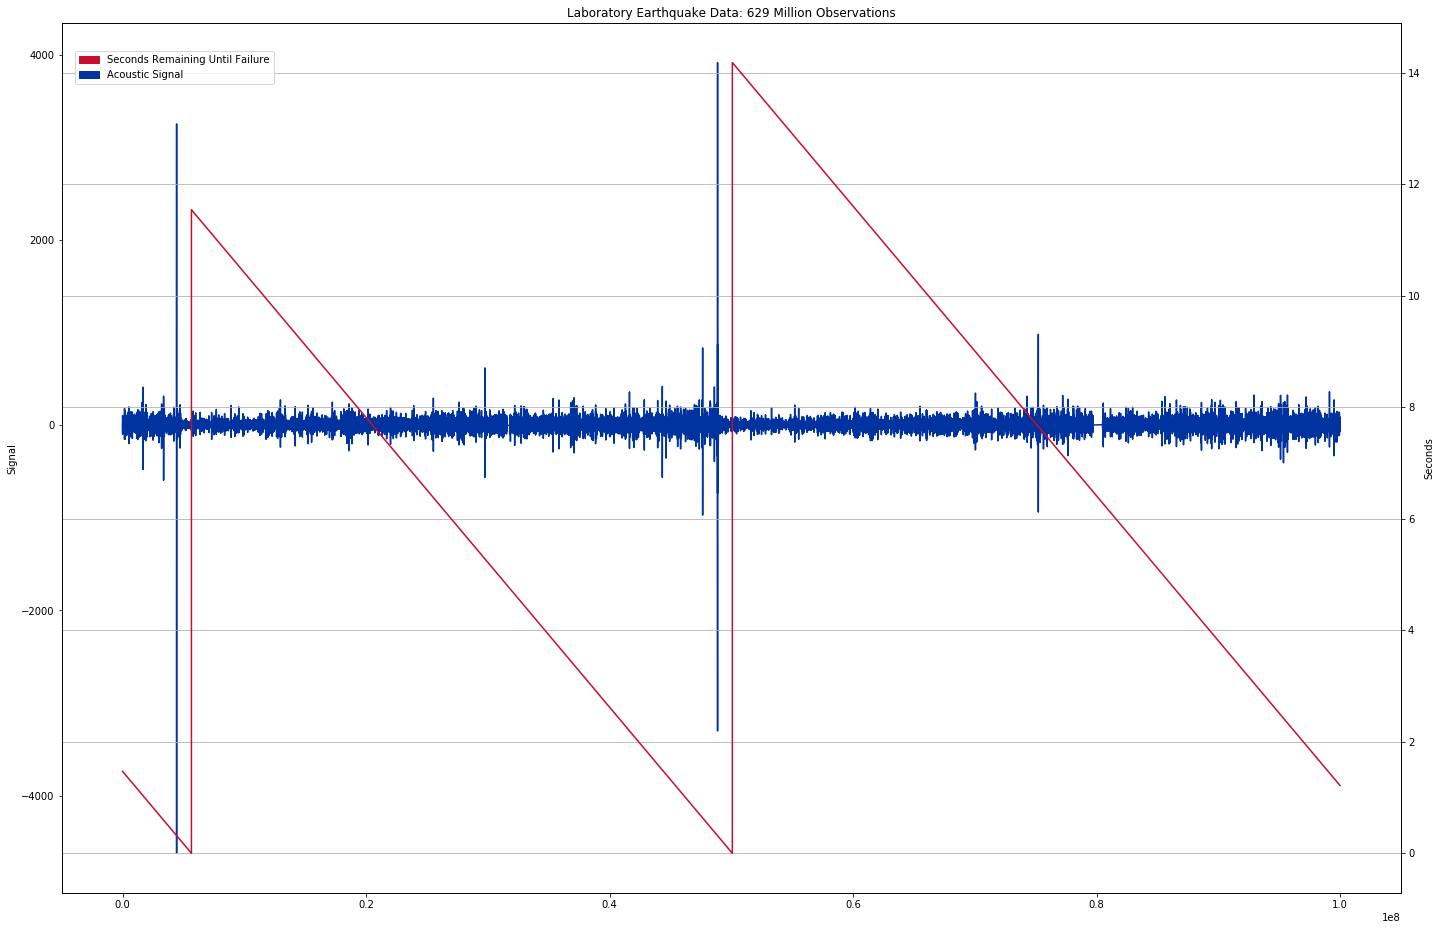

In [38]:
# train_ad_sample_df = train['acoustic_data'].values[::100]
# train_ttf_sample_df = train['time_to_failure'].values[::100]
import matplotlib.patches as mpatches

train_ad_sample_df = plotme['acoustic_data']
train_ttf_sample_df = plotme['time_to_failure']

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Laboratory Earthquake Data: 629 Million Observations"):
    fig, ax1 = plt.subplots(figsize=(24,16))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='#0033A0')
    ax1.set_ylabel('Signal')
    #plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='#C8102E')
    ax2.set_ylabel('Seconds')
    #plt.legend(['time to failure'], loc=(0.01, 0.9))
    red_patch = mpatches.Patch(color='#C8102E', label='Seconds Remaining Until Failure')
    blue_patch = mpatches.Patch(color='#0033A0', label='Acoustic Signal')
    plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)

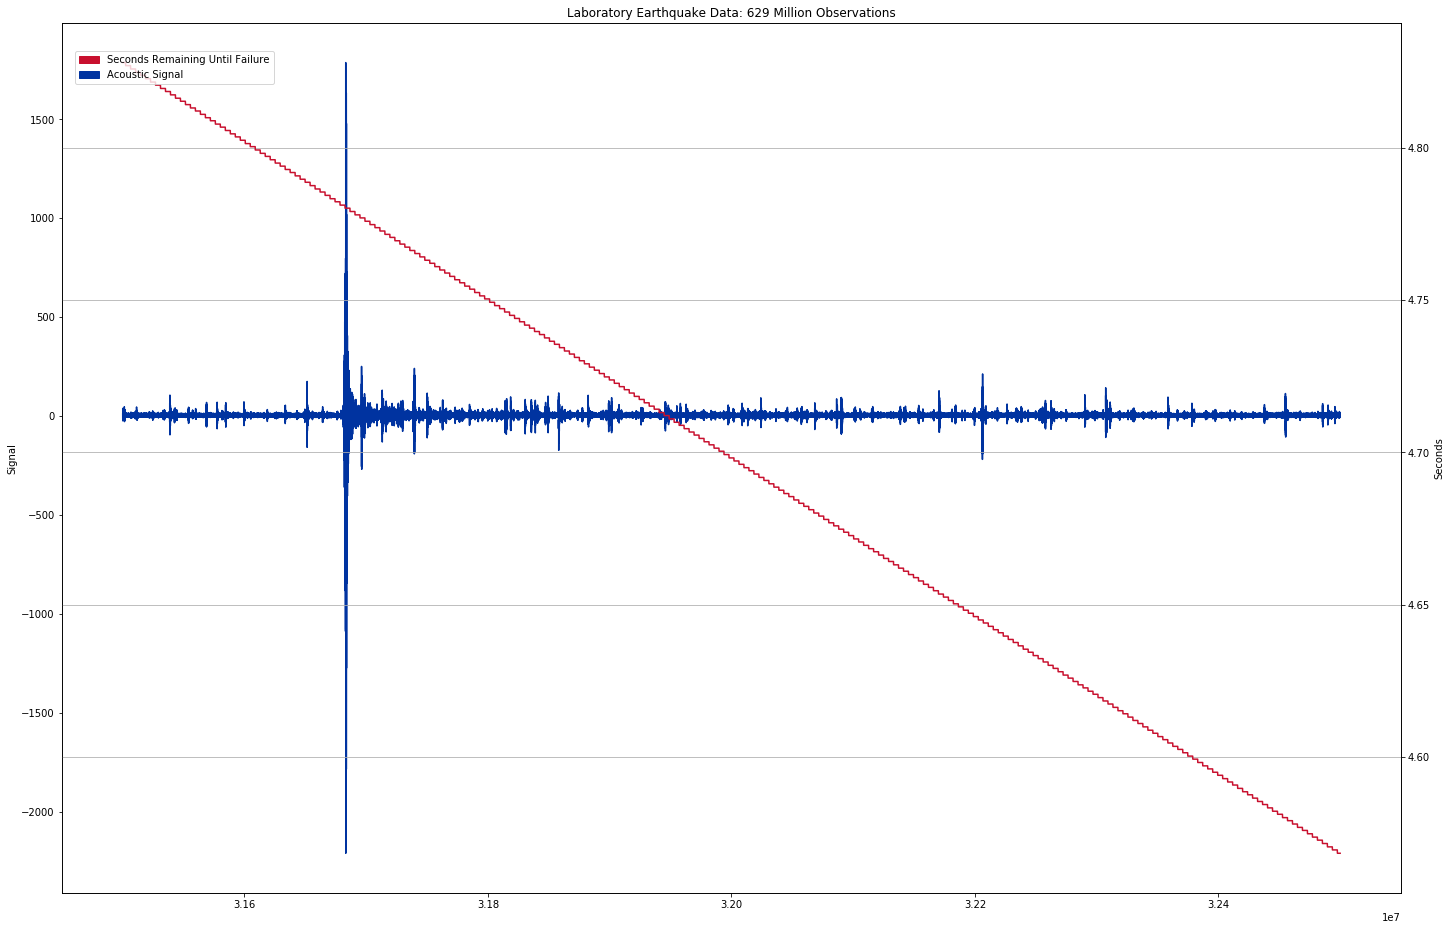

In [14]:
# train_ad_sample_df = train['acoustic_data'].values[::100]
# train_ttf_sample_df = train['time_to_failure'].values[::100]
import matplotlib.patches as mpatches

train_ad_sample_df = plotme['acoustic_data']
train_ttf_sample_df = plotme['time_to_failure']

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Laboratory Earthquake Data: 629 Million Observations"):
    fig, ax1 = plt.subplots(figsize=(24,16))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='#0033A0')
    ax1.set_ylabel('Signal')
    #plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='#C8102E')
    ax2.set_ylabel('Seconds')
    #plt.legend(['time to failure'], loc=(0.01, 0.9))
    red_patch = mpatches.Patch(color='#C8102E', label='Seconds Remaining Until Failure')
    blue_patch = mpatches.Patch(color='#0033A0', label='Acoustic Signal')
    plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)

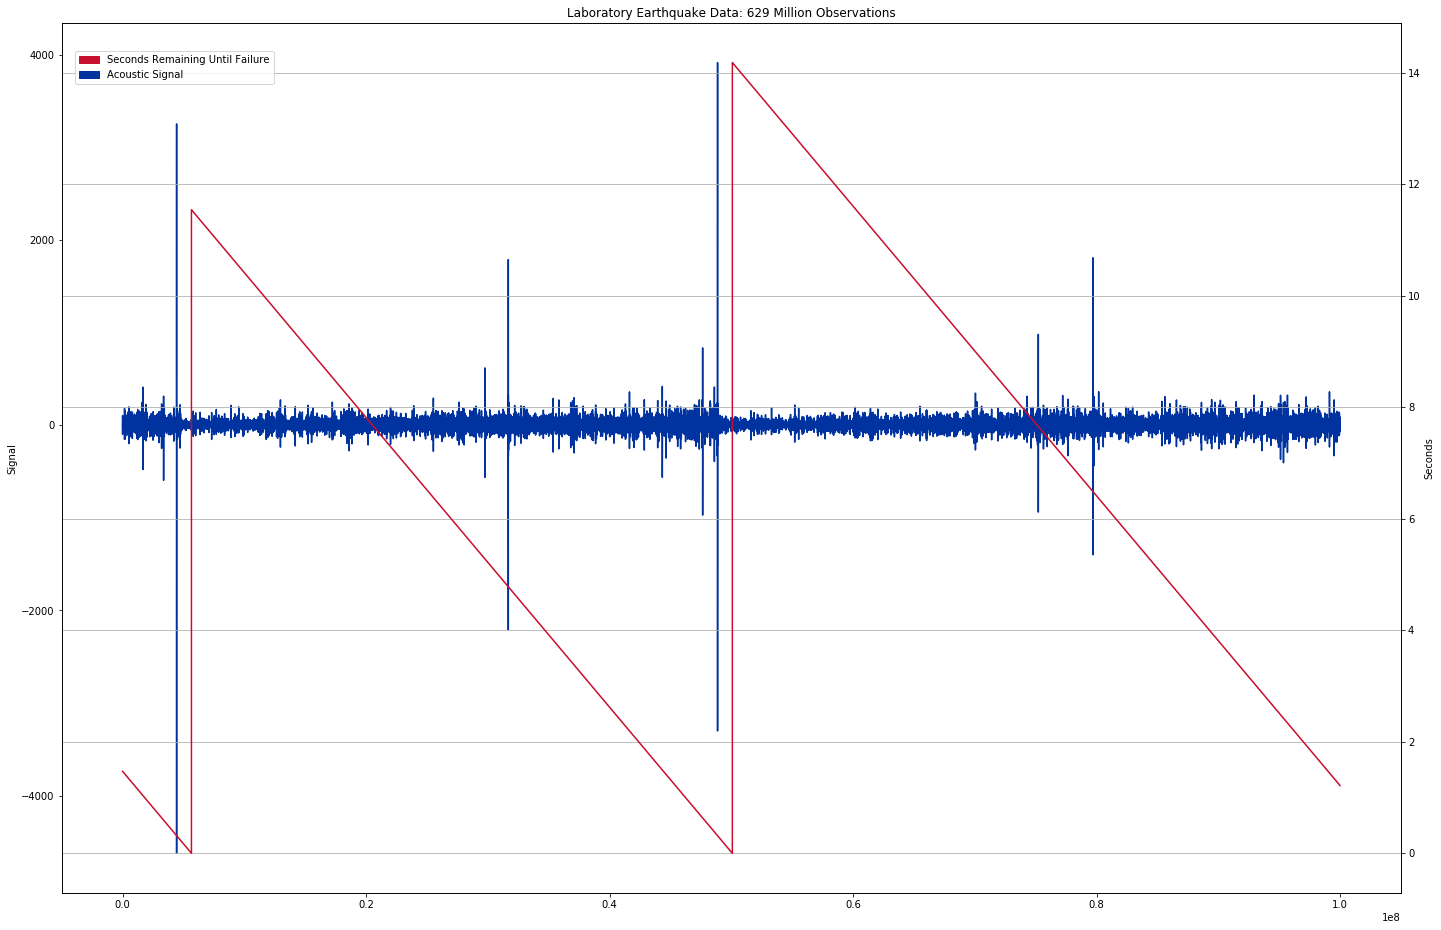

In [11]:
# train_ad_sample_df = train['acoustic_data'].values[::100]
# train_ttf_sample_df = train['time_to_failure'].values[::100]
import matplotlib.patches as mpatches

train_ad_sample_df = plotme['acoustic_data']
train_ttf_sample_df = plotme['time_to_failure']

def plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df, title="Laboratory Earthquake Data: 629 Million Observations"):
    fig, ax1 = plt.subplots(figsize=(24,16))
    plt.title(title)
    plt.plot(train_ad_sample_df, color='#0033A0')
    ax1.set_ylabel('Signal')
    #plt.legend(['acoustic data'], loc=(0.01, 0.95))
    ax2 = ax1.twinx()
    plt.plot(train_ttf_sample_df, color='#C8102E')
    ax2.set_ylabel('Seconds')
    #plt.legend(['time to failure'], loc=(0.01, 0.9))
    red_patch = mpatches.Patch(color='#C8102E', label='Seconds Remaining Until Failure')
    blue_patch = mpatches.Patch(color='#0033A0', label='Acoustic Signal')
    plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
    plt.grid(True)

plot_acc_ttf_data(train_ad_sample_df, train_ttf_sample_df)

In [3]:
#The Amplitude Spectral Density ASDs are the square root of the power spectral densities (PSDs), 
#which are averages of the square of the fast fourier transforms (FFTs) of the data.

from scipy.fftpack import fft, rfft
import math
from tqdm import tqdm
from scipy.stats import moment
#rows = 150_000
rows = 1_500_000
segments = int(np.floor(train.shape[0] / rows))

X_train = pd.DataFrame(index=range(segments), dtype=np.float64)
y_train = pd.DataFrame(index=range(segments), dtype=np.float64)

for segment in tqdm(range(segments)):
    seg = train.iloc[segment*rows:segment*rows+rows]
    #seg = seg[seg.acoustic_data.between(0,5000)]
    x = seg['acoustic_data']   # pd series
    y = seg['time_to_failure'].values[-1]  # single value
    
    #y_train.loc[segment, 'time_to_failure'] = np.log(y)
    y_train.loc[segment, 'time_to_failure'] = np.sqrt(y)
    
    I_ave10 = 0.1*len(x)
    II_ave10 = 0.2*len(x)
    III_ave10 = 0.3*len(x)
    IV_ave10 = 0.4*len(x)
    V_ave10 = 0.5*len(x)
    VI_ave10 = 0.6*len(x)
    VII_ave10 = 0.7*len(x)
    VIII_ave10 = 0.8*len(x)
    IX_ave10 = 0.9*len(x)
    
            
    #X_train.loc[segment, 'rFFT mean'] = rfft(x).mean()
    #X_train.loc[segment, 'rFFT std'] = rfft(x).std()
       
    #X_train.loc[segment, '0<x<5'] = sum(x.between(0, 5))
    #X_train.loc[segment, '5<x<10'] = sum(x.between(5, 10))    
    #X_train.loc[segment, '10<x<20'] = sum(x.between(10, 20))
    #X_train.loc[segment, '20<x<30'] = sum(x.between(20, 30))
    #X_train.loc[segment, '30<x<100'] = sum(x.between(30, 100))
    #X_train.loc[segment, '100<x<500'] = sum(x.between(100, 500))
    #X_train.loc[segment, '500<x<1000'] = sum(x.between(500, 1000))
    #X_train.loc[segment, '1000<x<5000'] = sum(x.between(1000, 5000))
    
    #X_train.loc[segment, 'skewness'] = moment(x, moment=3)
    #X_train.loc[segment, 'kurtosis'] = moment(x, moment=4)
    #X_train.loc[segment, 'hyperskewness m5'] = moment(x, moment=5)
    #X_train.loc[segment, 'hyperskewness m6'] = moment(x, moment=6)
    #X_train.loc[segment, 'hyperskewness m7'] = moment(x, moment=7)
    #X_train.loc[segment, 'hyperskewness m8'] = moment(x, moment=8)
    #X_train.loc[segment, 'hyperskewness m9'] = moment(x, moment=9)
    #X_train.loc[segment, 'hyperskewness m10'] = moment(x, moment=10)
    #X_train.loc[segment, 'ave'] = x.values.mean()
    X_train.loc[segment, 'std'] = x.values.std()
    #X_train.loc[segment, 'max'] = x.values.max()
    #X_train.loc[segment, 'min'] = x.values.min()
        
    X_train.loc[segment, 'q90'] = np.quantile(x.values, 0.90)
    #X_train.loc[segment, 'q91'] = np.quantile(x.values, 0.91)
    #X_train.loc[segment, 'q92'] = np.quantile(x.values, 0.92)
    #X_train.loc[segment, 'q93'] = np.quantile(x.values, 0.93)
    #X_train.loc[segment, 'q94'] = np.quantile(x.values, 0.94)
    X_train.loc[segment, 'q95'] = np.quantile(x.values, 0.95)
    #X_train.loc[segment, 'q96'] = np.quantile(x.values, 0.96)
    #X_train.loc[segment, 'q97'] = np.quantile(x.values, 0.97)
    #X_train.loc[segment, 'q98'] = np.quantile(x.values, 0.98)
    X_train.loc[segment, 'q99'] = np.quantile(x.values, 0.99)
    #X_train.loc[segment, 'q01'] = np.quantile(x.values, 0.01)
    #X_train.loc[segment, 'q02'] = np.quantile(x.values, 0.02)
    #X_train.loc[segment, 'q03'] = np.quantile(x.values, 0.03)
    #X_train.loc[segment, 'q04'] = np.quantile(x.values, 0.04)
    ##X_train.loc[segment, 'q05'] = np.quantile(x.values, 0.05)
    #X_train.loc[segment, 'q06'] = np.quantile(x.values, 0.06)
    #X_train.loc[segment, 'q07'] = np.quantile(x.values, 0.07)
    #X_train.loc[segment, 'q08'] = np.quantile(x.values, 0.08)
    #X_train.loc[segment, 'q09'] = np.quantile(x.values, 0.09)
    #X_train.loc[segment, 'q50'] = np.quantile(x.values, 0.5)
    
    #X_train.loc[segment, 'abs_max'] = np.abs(x.values).max()
    #X_train.loc[segment, 'abs_mean'] = np.abs(x.values).mean()
    X_train.loc[segment, 'abs_std'] = np.abs(x.values).std()
        
     # New features - rolling features
    for w in [100, 1000, 10000]:
        x_roll_std = x.rolling(w).std().dropna().values
        x_roll_mean = x.rolling(w).mean().dropna().values
        x_roll_abs_mean = x.abs().rolling(w).mean().dropna().values
        
        X_train.loc[segment, 'ave_roll_std_' + str(w)] = x_roll_std.mean()
        X_train.loc[segment, 'std_roll_std_' + str(w)] = x_roll_std.std()
        #X_train.loc[segment, 'max_roll_std_' + str(w)] = x_roll_std.max()
        X_train.loc[segment, 'min_roll_std_' + str(w)] = x_roll_std.min()
        #X_train.loc[segment, 'mean_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).mean()
        #X_train.loc[segment, 'std_rFFT_roll_std_' + str(w)] = rfft(x_roll_std).std()
                        
        #X_train.loc[segment, 'ave_roll_mean_' + str(w)] = x_roll_mean.mean()
        #X_train.loc[segment, 'std_roll_mean_' + str(w)] = x_roll_mean.std()
        #X_train.loc[segment, 'max_roll_mean_' + str(w)] = x_roll_mean.max()
        #X_train.loc[segment, 'min_roll_mean_' + str(w)] = x_roll_mean.min()
        #X_train.loc[segment, 'mean_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).mean()
        #X_train.loc[segment, 'std_rFFT_roll_mean_' + str(w)] = rfft(x_roll_mean).std()
               
              
        X_train.loc[segment, 'q01_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.01)
        X_train.loc[segment, 'q05_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.05)
        X_train.loc[segment, 'q10_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.10)
        X_train.loc[segment, 'q90_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.90)
        X_train.loc[segment, 'q95_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.95)
        X_train.loc[segment, 'q99_roll_std_' + str(w)] = np.quantile(x_roll_std, 0.99)
        #X_train.loc[segment, 'q01_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_mean_' + str(w)] = np.quantile(x_roll_mean, 0.99)
        #X_train.loc[segment, 'ave_roll_abs_mean_' + str(w)] = x_roll_abs_mean.mean()
        X_train.loc[segment, 'std_roll_abs_mean_' + str(w)] = x_roll_abs_mean.std()
        #X_train.loc[segment, 'max_roll_abs_mean_' + str(w)] = x_roll_abs_mean.max()
        #X_train.loc[segment, 'min_roll_abs_mean_' + str(w)] = x_roll_abs_mean.min()
        #X_train.loc[segment, 'q01_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.01)
        #X_train.loc[segment, 'q05_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.05)
        #X_train.loc[segment, 'q95_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.95)
        #X_train.loc[segment, 'q99_roll_abs_mean_' + str(w)] = np.quantile(x_roll_abs_mean, 0.99)
          
       

100%|██████████| 419/419 [11:06<00:00,  1.53s/it]


In [4]:
X = X_train
Y= y_train

In [5]:
#https://www.kaggle.com/jsaguiar/baseline-with-multiple-models
from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.3,random_state=100, shuffle=True)
#print(X_train.shape)
#print(X_test.shape)
#print(y_train.shape)
#print(y_test.shape)

X_train= X[:219]
X_test = X[-200:]
y_train = Y[:219]
y_test = Y[-200:]

from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train)
scl_obj.fit(X_test)
X_test_scaled = scl_obj.transform(X_test)  
scl_obj.fit(X)
X_scaled = scl_obj.transform(X)

In [6]:
# https://scikit-learn.org/stable/modules/ensemble.html#forest
# The main parameters to adjust when using these methods is n_estimators and max_features.
#n_estimators is the number of trees in the forest. The larger the better, but also the longer it will take to compute.
#In addition, note that results will stop getting significantly better beyond a critical number of trees.
#max_features is the size of the random subsets of features to consider when splitting a node.
#The lower the greater the reduction of variance, but also the greater the increase in bias.
#Empirical good default values are max_features=n_features for regression problems, and
#max_features=sqrt(n_features) for classification tasks (where n_features is the number of features in the data).
#Good results are often achieved when setting max_depth=None in combination with 
#min_samples_split=2 (i.e., when fully developing the trees). 
#Bear in mind though that these values are usually not optimal, and might result in models that consume a lot of RAM.
#The best parameter values should always be cross-validated. In addition, note that in random forests, bootstrap samples are
#used by default (bootstrap=True) while the default strategy for extra-trees is to use the whole dataset (bootstrap=False).
#When using bootstrap sampling the generalization accuracy can be estimated on the left out or out-of-bag samples.
#This can be enabled by setting oob_score=True.


# https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2017GL074677&file=grl56367-sup-0001-supinfo.pdf

#An accelerometer records the acoustic emission (AE) emanating from the shearing layers. 
#The shear stress imposed by the driving block is also monitored as well as other physical parameters such
#as the shearing rate, gouge layer thickness, friction, and the applied load


# The minimum number of samples to generate a split was 30.
# The maximum number of features to consider when making a split was 40 (out of 100 features).
# The forest size was 1000 trees. The performance of the random forest is not sensitive to this choice of
#hyper-parameters: changing any hyper parameter by a factor of 2 typically affects the R2 performance by
#only a few percent.

# To create a model that uncovers the physics of shear failure, we make predictions
# 119 using moving time windows applied to the data. Each window is 1.8s, which is small
# 120 compared to the time between fault gouge failures (8s on average). The offset between
# 121 windows is 0.18s, meaning that consecutive time windows overlap by 90 percent. We
# 122 characterize the acoustical signal in each window by a set of ≈ 50 statistical features (de123 tailed in section “Statistical feature”). Each window is further split in two, and the features are computed for each sub-window to form one data point xi
# 124 , totaling ≈ 100 statis125 tical features. We then label the data point xi according to the time remaining until the
# next gouge failure, yi
# 126 , determined from the stress signal.




# At each node, we select a random subset of 40
# 69 percent of the available features.

# We compute
# 112 regularization hyper-parameters by grid search based on a 3-fold cross-validation.

# grid = {
#     'max_depth': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'min_samples_leaf': [10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
# #     'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100],
#       'min_samples_split': [30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50],
#     'bootstrap': [True]
# }

grid = {
    'max_depth': [8, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [2, 4, 12],
    'min_samples_split': [2, 6, 12],
    }

# rfr = RandomForestRegressor(criterion='mse',n_estimators=1000,n_jobs=-1)
rfr = RandomForestRegressor(criterion='mse',n_estimators=1000,n_jobs=-1)
gs1 = RandomizedSearchCV(rfr, param_distributions = grid)  
gs1.fit(X_train_scaled, y_train.values.ravel())  
gs1.best_params_

{'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

mean_absolute_error: 1.6188756785734946
r2_score: 0.6458079954758321


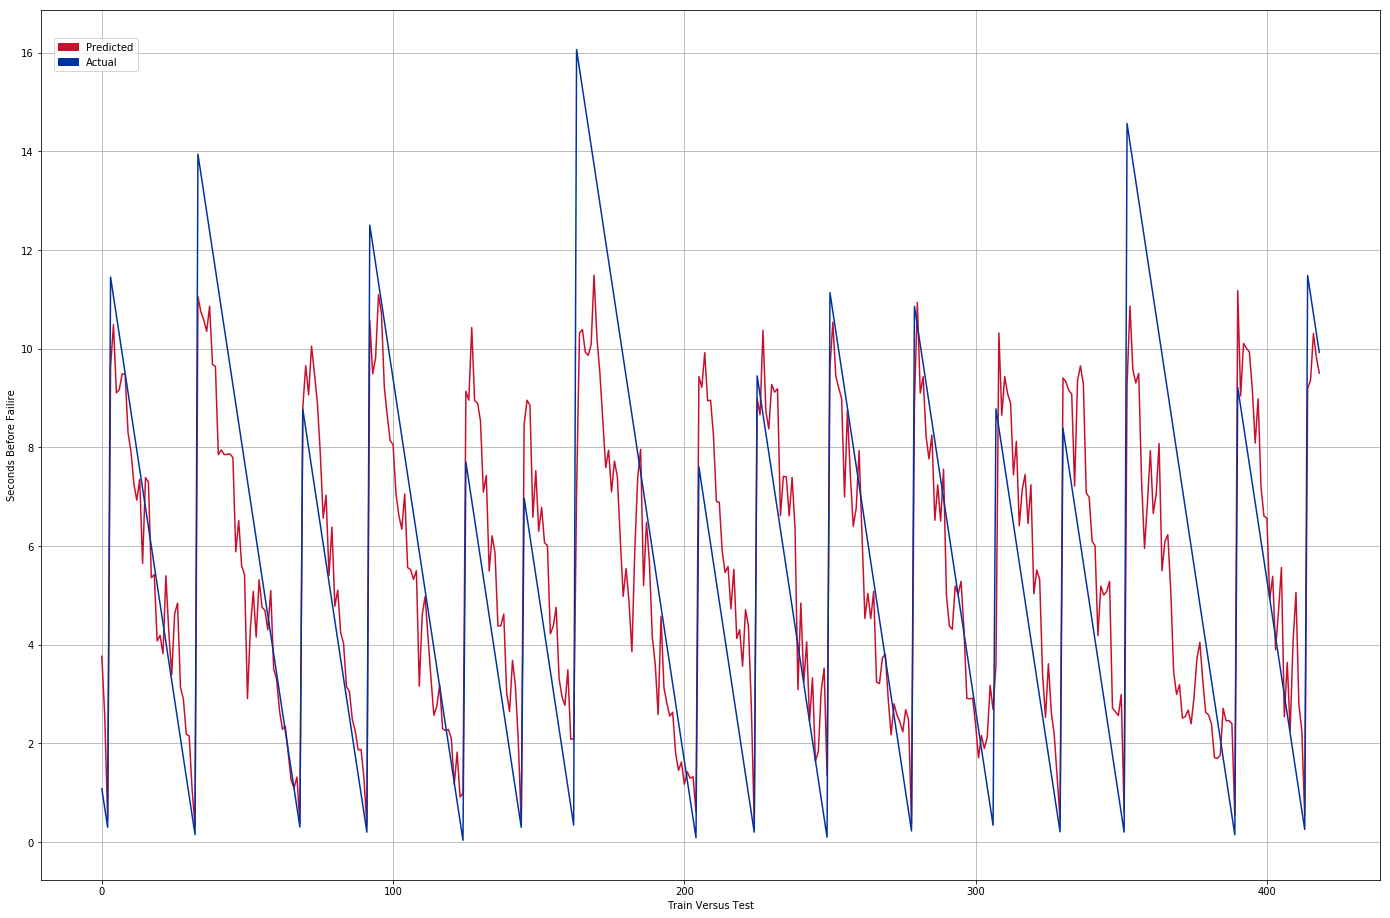

In [7]:
predictions =  gs1.predict(X_test_scaled)
full_predictions = gs1.predict(X_scaled)

y_predict = np.square(predictions)
y_test_nolog = np.square(y_test)
y_nolog = np.square(Y)
y_nolog_predict = np.square(full_predictions)
print('mean_absolute_error:', mean_absolute_error(y_test_nolog, y_predict))
print('r2_score:', r2_score(y_test_nolog, y_predict))

fig, axis = plt.subplots(figsize=(24,16),)
ax3 = axis
ax3.set_xlabel('Train Versus Test')
ax3.set_ylabel('Seconds Before Failire')
ax3.plot(y_nolog_predict, color='#C8102E')
ax3.plot(y_nolog, color='#0033A0')
red_patch = mpatches.Patch(color='#C8102E', label='Predicted')
blue_patch = mpatches.Patch(color='#0033A0', label='Actual')
plt.legend(handles=[red_patch,blue_patch],loc=(0.01, 0.93))
plt.grid(True)

In [19]:
import numpy as np

def mean_absolute_percentage_error(y_test_nolog, y_predict): 
    y_test_nolog, y_predict = np.array(y_test_nolog), np.array(y_predict)
    return np.mean(np.abs((y_test_nolog - y_predict) / y_test_nolog)) * 100

mean_absolute_percentage_error(y_nolog_predict,y_nolog)


125.07424517525101

In [16]:
meanabspercerror

2.3668476831403322

In [9]:
# Save data
X.to_csv(r'X.csv')
Y.to_csv(r'Y.csv')
X_train.to_csv(r'X_train.csv')
X_test.to_csv(r'X_test.csv')
y_train.to_csv(r'y_train.csv')
y_test.to_csv(r'y_test.csv')
np.save('X_train_scaled', X_train_scaled)
np.save('X_test_scaled', X_test_scaled)
np.save('X_scaled', X_scaled)

# temp1=train[0:100000000]
# temp2=train[100000000:200000000]
# temp3=train[200000000:300000000]
# temp4=train[300000000:400000000]
# temp5=train[400000000:500000000]
# temp6=train[500000000:600000000]
# temp7=train[600000000:]

# temp1.to_csv(r'1st100000000.csv')
# temp2.to_csv(r'2nd100000000.csv')
# temp3.to_csv(r'3rd100000000.csv')
# temp4.to_csv(r'4th100000000.csv')
# temp5.to_csv(r'5th100000000.csv')
# temp6.to_csv(r'6th100000000.csv')
# temp7.to_csv(r'7th100000000.csv')



In [ ]:
# Load Model From Disk
full_predictions = pickle.load(open('full_predictions.sav', 'rb'))
predictions = pickle.load(open('predictions.sav', 'rb'))

In [ ]:
# Save Model to Disk
filename = 'full_predictions.sav'
pickle.dump(full_predictions, open(filename, 'wb'))
filename = 'predictions.sav'
pickle.dump(predictions, open(filename, 'wb'))
np.savetxt("y_nolog.csv", y_nolog, delimiter=",")
np.savetxt("y_nolog_predict.csv", y_nolog_predict, delimiter=",")